In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing libraries that are recquired for the EDA of this dataset.

In [4]:
df = pd.read_csv('1. Weather Data.csv')

Data Overview and Cleaning:

In [ ]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Initial exploration to check for the first 10 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Gives information about the rows and columns in the dataset as well as their data types.

In [ ]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


 Analyzes numeric as well as to object series or series of a DataFrame and check for outliers.

In [ ]:
df.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


Used to check for missing values in the dataset and presently we have none.

In [ ]:
df.duplicated().sum()

0

This function is used to check and identify duplicate values and as per the result of  the function we have no duplicate values.

Statistical Summary:

In [ ]:
statistical_summary = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
df[statistical_summary].describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


This provides insight to the measures of central tendency in the numerical fields in the weather dataset which are the mean, count, mode, standard deviation and quartiles.


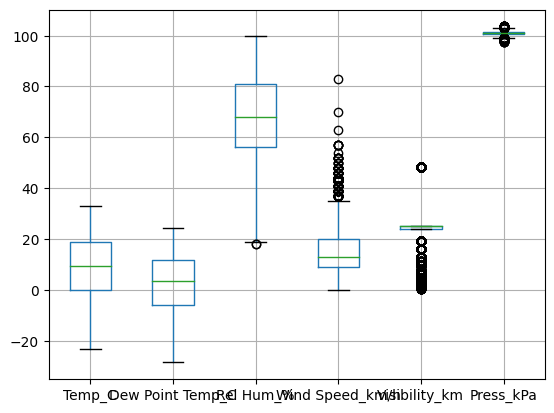

In [ ]:
df.boxplot(column=statistical_summary)
plt.show()


A box plot has been used to graphically represent and check for outliers. There are a few outliers identified on wind speed indicating extreme wind speed conditions and on visibilty as well there some that are on the lower side of the whisker indicating low visibility.There are multiple data points plotted above the upper whisker, meaning there is unusually high pressure values.

Data Visualization

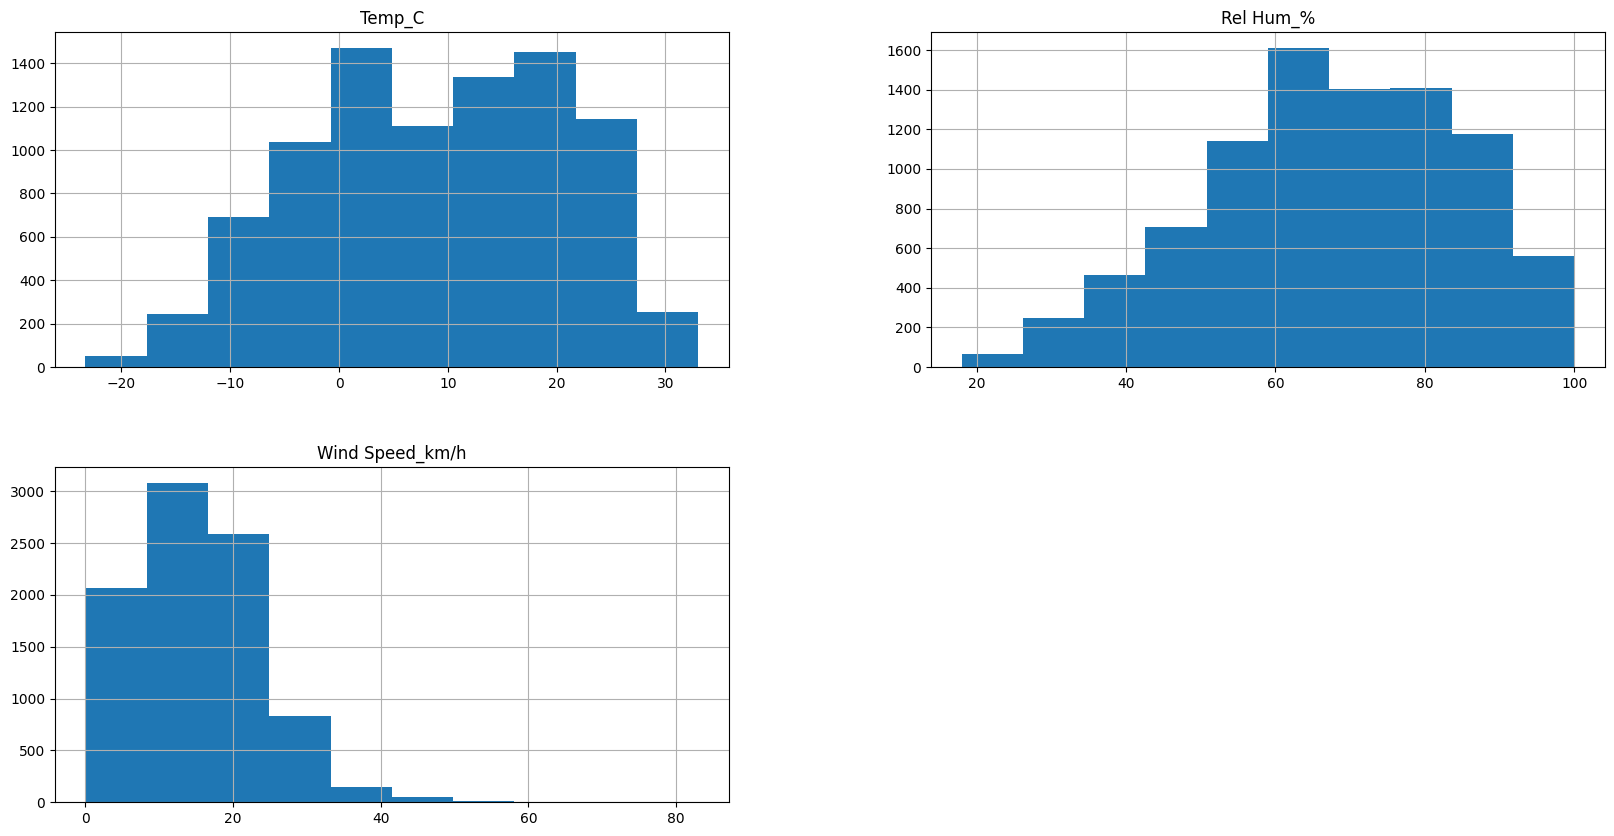

In [6]:
df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].hist(bins=10, figsize=(20, 10))
plt.show()


Temperature The temperature distribution appears to be normal, with a peak around 10-15 degrees Celsius. Temperatures span from approximately -20 to 30 degrees Celsius.There might be a few outliers in the lower temperature range.


Relative Humidity The relative humidity distribution is skewed to the right, with a peak around 60-70%. Humidity values range from approximately 20% to 100%. There might be some outliers in the higher humidity range.


Wind Speed The wind speed distribution is skewed to the left, with a peak around 5-10 km/h.
Range: Wind speeds vary from 0 to around 80 km/h, with most values concentrated in the lower range.There are some outliers in the higher wind speed range, which could represent extreme weather conditions.

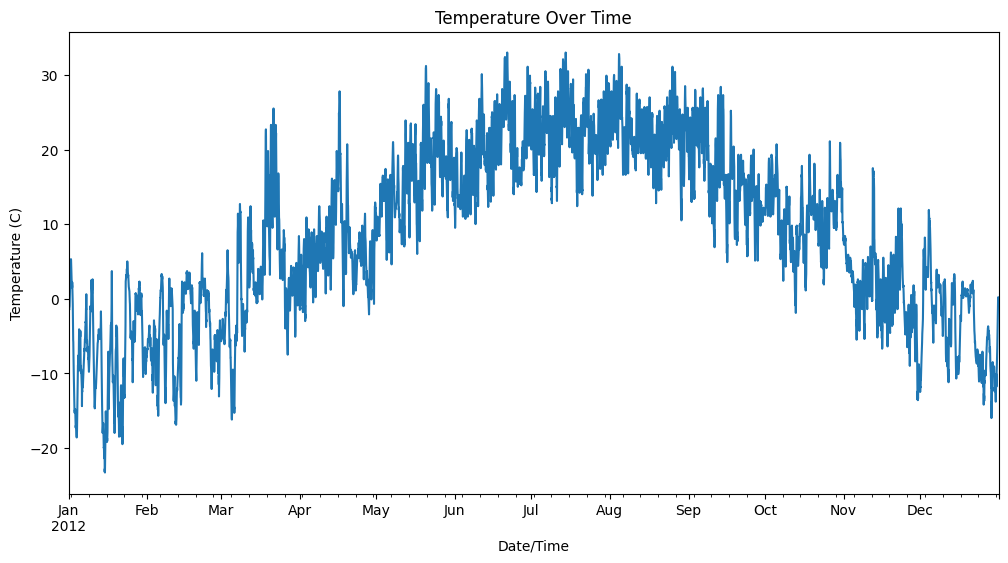

In [ ]:

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

#time series for temperature
df['Temp_C'].plot(figsize=(12, 6))
plt.title('Temperature Over Time')
plt.ylabel('Temperature (C)')
plt.show()


The graph depicts a clear seasonal pattern with temperatures rising from the beginning of the year, peaking in summer around July, and then declining towards winter which is between October and December.

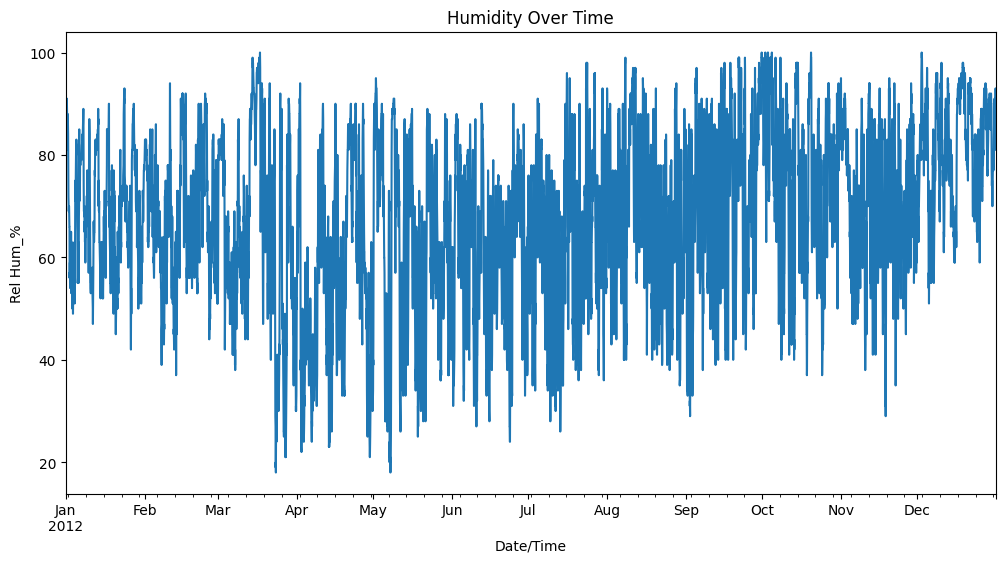

In [ ]:
#time series for humidity
df['Rel Hum_%'].plot(figsize=(12, 6))
plt.title('Humidity Over Time')
plt.ylabel('Rel Hum_%')
plt.show()

The humidity levels fluctuate significantly over time.
Seasonal Pattern: There appears to be a seasonal pattern with higher humidity levels during the summer months(May,June,July) and lower levels during the winter.

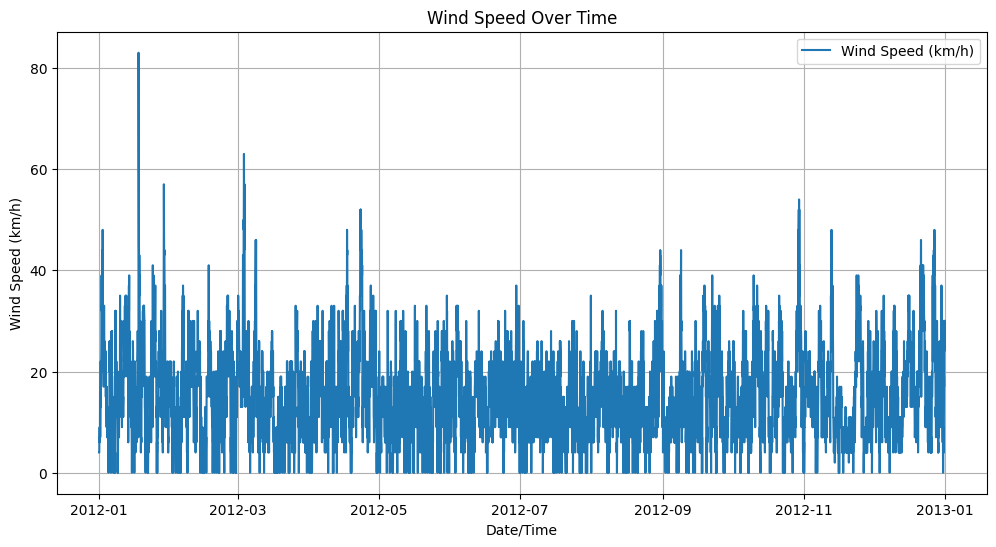

In [ ]:
#time series plot for wind speed
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Wind Speed_km/h'], label='Wind Speed (km/h)')
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.show()

There seems to be a normal distribution of wind speed throught the year with the highest wind speed recorded being above 80 and most records lying under 40 km/h.

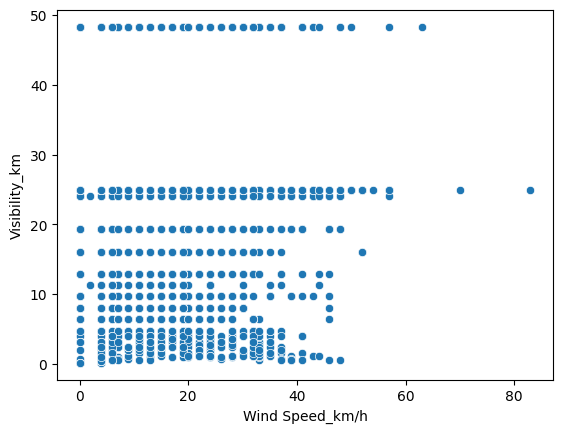

In [ ]:
#scatterplot
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', data=df)
plt.show()

There appears to be a weak or no correlation between wind speed and visibility. The data points are scattered across the plot, with no clear trend or pattern.

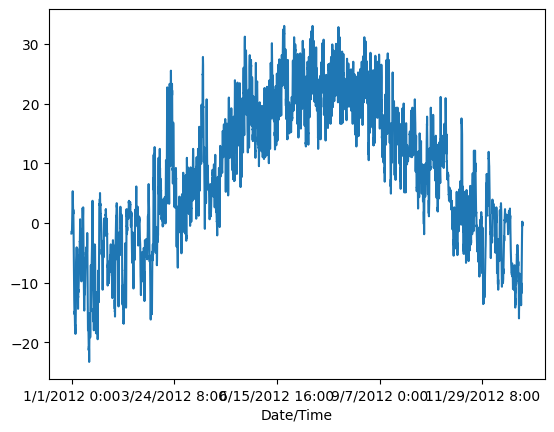

In [23]:
#Temperature graph series against time over the year
df.set_index('Date/Time', inplace=True)
df['Temp_C'].plot()
plt.show()

The temperature exhibits a strong annual cycle, with higher values in summer and lower values in winter. There are significant daily temperature variations, with peaks during the day and troughs at night.
A few extreme temperature spikes are observed, which could be due to unusual weather events or potential data errors.
The data appears to be relatively dense, with frequent measurements throughout the year.

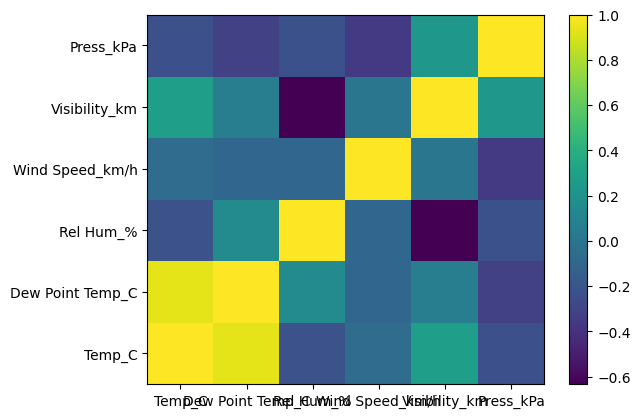

In [21]:
correlation_matrix = df.drop ('Weather',axis=1).corr()
plt.pcolor(correlation_matrix)
plt.yticks(np.arange(0.5, len(correlation_matrix.index), 1), correlation_matrix.index)
plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns)
plt.colorbar()
plt.show()

Temperature and Dew Point Temperature: There's a strong positive correlation, indicating that as temperature increases, dew point temperature also tends to increase.

Humidity and Temperature: There seems to be a moderate negative correlation, suggesting that as temperature increases, humidity tends to decrease slightly.

Wind Speed and other variables: Wind speed appears to have weak correlations with other variables.

Visibility and Pressure: There's a moderate positive correlation between visibility and pressure, suggesting that higher pressure tends to be associated with better visibility.

Overall Trend:
There's significant day-to-day fluctuation in temperature, even within the same season.
The lowest temperatures occur in winter (around December to February), and the highest temperatures occur in summer (around July).
There seem to be a few spikes in temperature, particularly in the winter months, which might indicate unusual weather events or potential data errors.